# Topic Modelling on Core and Peripheral developers conversations using Bertopic and GPT3

This notebook contain codes implemented to extract topics using Bertopic and GPT3. Run all cells to ontain results. Due to the nature of language models, you might not obtain the extact same labels for the topics as seen in the report. However, the topics produced would be similar. (NB: GPT3 API is needed to run the large language model which is provided in the report for this purpose).

In [ ]:
# Install bertopic
!pip install bertopic

# install openai
!pip install openai

# install wordcloud
!pip install wordcloud

# library to check length of tokens passed to GPT3
!pip install tiktoken

In [5]:

# libraries for file handling
import pandas as pd
import ast
import json
import csv
import pickle


# Bertopic related libraries
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import nltk
nltk.download('stopwords')

# Libraries to evaluate Bertopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# library for obtaining semantic embeddings of topics
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api
import matplotlib.pyplot as plt
from collections import Counter
import spacy
from umap import UMAP


# libraries for plots and visual representation of results
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from wordcloud import WordCloud, STOPWORDS

# libraries related to GPT3
import tiktoken
from openai import OpenAI






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We assume the dataset obtained from previous run is saved to google drive. The below cells requests access to google drive inorder to access the datasets.

In [8]:
from google.colab import drive
import pickle

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
core_answer_path = '/content/drive/MyDrive/AfariUduak663/core_answer.json'
peri_answer_path = '/content/drive/MyDrive/AfariUduak663/peripheral_answer.json'

In [10]:
core_prompt_path = '/content/drive/MyDrive/AfariUduak663/core_prompt.json'
peri_prompt_path = '/content/drive/MyDrive/AfariUduak663/peripheral_prompt.json'

In [52]:
# Opening JSON file
with open(core_answer_path, 'r') as openfile:

    # Reading from json file
    json_object_core = json.load(openfile)

print(len(json_object_core))

1729


In [16]:
# Opening JSON file
with open(core_prompt_path, 'r') as openfile:

    # Reading from json file
    json_object_core_prompt = json.load(openfile)

print(len(json_object_core_prompt))

1729


In [17]:
# Opening JSON file
with open(peri_prompt_path, 'r') as openfile:

    # Reading from json file
    json_object_peri_prompt = json.load(openfile)

print(len(json_object_peri_prompt))

2325


In [18]:
# Opening JSON file
with open(peri_answer_path, 'r') as openfile:

    # Reading from json file
    json_object_peri = json.load(openfile)

print(len(json_object_peri))

2325


In [20]:
# Delete duplicate convo

convo_core_answer = []

for convo in json_object_core:
    if convo not in convo_core_answer:
        convo_core_answer.append(convo)

convo_core_prompt = []

for convo in json_object_core_prompt:
    if convo not in convo_core_prompt:
        convo_core_prompt.append(convo)

# Delete duplicate convo

convo_peri_answer = []

for convo in json_object_peri:
    if convo not in convo_peri_answer:
        convo_peri_answer.append(convo)



convo_peri_prompt = []

for convo in json_object_peri_prompt:
    if convo not in convo_peri_prompt:
        convo_peri_prompt.append(convo)

In [21]:
core_all = convo_core_answer + convo_core_prompt

In [22]:
len(convo_core_prompt)

325

In [23]:
peri_all = convo_peri_answer + convo_peri_prompt

In [24]:
len(peri_all)

1190

# **Topic Modeling**

In [25]:
# initialise bertopic model
topic_model_core = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)
topic_model_peri = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)

In [61]:
topic_model_core.save("/content/drive/MyDrive/AfariUduak663/bertopic_model_core", serialization="pickle")

2023-12-08 05:19:41,416 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [62]:
topic_model_peri.save("/content/drive/MyDrive/AfariUduak663/bertopic_model_peripheral", serialization="pickle")

2023-12-08 05:20:14,733 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [120]:
# Load from file
loaded_model = BERTopic.load("/content/drive/MyDrive/AfariUduak663/bertopic_model_core")

Core

In [123]:
topics_core, probs_core = topic_model_core.fit_transform(core_all)

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

Peripheral

In [ ]:
topics_peri, probs_peri = topic_model_peri.fit_transform(peri_all)

## Extracting Topics
Inspect most frequent topics

In [ ]:
freq_core = topic_model_core.get_topic_info();
freq_core.head(50)

In [ ]:
freq_core

In [ ]:
freq_peri = topic_model_peri.get_topic_info();
freq_peri.head(270)

# **Visualization**


## Visualize Topics


In [30]:
# Core developers topics
topic_model_core.visualize_topics()

In [31]:
# Peripheral developers topics
topic_model_peri.visualize_topics()

## Visualize Topic Probabilities

visualize the distributions across topics

In [32]:
# Peripheral
topic_model_peri.visualize_distribution(probs_peri[200], min_probability=0.015)

In [34]:
topic_model_core.visualize_distribution(probs_peri[200], min_probability=0.015)

In [35]:
topic_model_core.visualize_hierarchy(top_n_topics=50)

In [36]:
topic_model_peri.visualize_hierarchy(top_n_topics=50)

## Visualize Terms


In [37]:
topic_model_core.visualize_barchart(top_n_topics=50)

In [38]:
topic_model_peri.visualize_barchart(top_n_topics=50)

## Visualize Topic Similarity


In [39]:
topic_model_core.visualize_heatmap(n_clusters=8, width=1000, height=1000)

In [40]:
topic_model_peri.visualize_heatmap(n_clusters=8, width=1000, height=1000)

# Finetune topics using GPT3

In [41]:

client = OpenAI(
    # This is the default and can be omitted
    api_key= "",
)

In [42]:
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo-0613')

In [43]:
def split_string_with_limit(text: str, limit: int, encoding):
    tokens = encoding.encode(text)
    parts = []
    current_part = []
    current_count = 0

    for token in tokens:
        current_part.append(token)
        current_count += 1

        if current_count >= limit:
            parts.append(current_part)
            current_part = []
            current_count = 0

    if current_part:
        parts.append(current_part)

    text_parts = [encoding.decode(part) for part in parts]

    return text_parts

In [44]:
#function to return the queried response
def generate_gpt3_topics(user_text, print_output=True):
    """
    Query OpenAI GPT-3 for the specific key and get back a response
    :type user_text: str the user's text to query for
    :type print_output: boolean whether or not to print the raw output JSON
    """

    max_token = 4000

    # truncate text if it exceeds max_token
    prompt = split_string_with_limit(user_text, max_token, encoding)
    # print(f'number of token: {num_tokens_from_string(prompt[0],encoding)}')

    response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {
          "role":"system",
          "content": "You are a topic modelling expert. You excel at classifying text into an appropriate number of topics"
        },
        {
            "role":"user",
            "content": f"{prompt[0]}"
        }
      ],
    )
    print(response.choices[0].message.content)
    return response.choices[0].message.content

In [45]:
freq_core['GPT3_topics'] = freq_core['Representative_Docs'].apply(lambda x: generate_gpt3_topics("You are my topic modelling expert. I will be providing you with a document that has been grouped by Bertopic. \
                Your task is to assign a single topic that captures the document provided. \
                return your response in text only\
                You must return only ONE word. No further explanation needed. Here are the words with their associated weights {} ".format(x)))


AI
Prompt-response
optimization
Data
execute_only
Jinja
code
Integration
functions
Function
code
Authentication
Docker
GitHub
Documentation
Option
Troubleshooting
Error
Script
speed
Gap_sizes
Database
code_definition
Parsing
Scraping
Parsing
Model


In [46]:
freq_peri['GPT3_topics'] = freq_peri['Representative_Docs'].apply(lambda x: generate_gpt3_topics("You are my topic modelling expert. I will be providing you with a document that has been grouped by Bertopic. \
                Your task is to assign a single topic that captures the document provided. \
                return your response in text only\
                You must return only ONE word. No further explanation needed. Here are the words with their associated weights {} ".format(x)))

Library
GitHub
Error
Model
testing
Script
forward
plugin
Workflow
Code
Translation
LocalStack
UUID
Binary
Code
More
Error
Confusion
lambda
Logging
Caching
Odoo
Gym
Operating
Formatter
Branch
NLP
ModuleNotFoundError
Evaluation
Error
Assistance
Error
PySimpleGUI
Installation


In [ ]:
core_label_dict_ = {}
core_label_lst_ = []

for i in range(30):
  convo = topic_model_core.get_topic(i)

  # define prompt and parameters for GPT API call
  # prompt = f"'role': 'user', 'content': 'You are my topic modelling expert. I will be providing you with text containing responses from ChatGPT, which are answers to developers questions. Your task is to identify the core topic in the text. Your topics can be high level categories like bug fixing, performance, security, program functionality or the related high level topics. The text is: {core_response_convo}'"
  # temperature = 0.5
  # max_tokens = 50

  # call OpenAI GPT-3 API
  response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
          {
          "role":"system",
          "content": "You are a topic modelling expert. You excel at classifying text into an appropriate number of topics"
        },
        {

            "role":"user",
            "content": f"You are my topic modelling expert. I will be providing you with top 5 words representative in a topic as identified by Bertopic along with their weights. \
                Your task is to assign a single topic that captures the words provided. \
                Note that this document contains chats between software developers and chatgpt, your response should take this into account.\
                You must return only ONE word. No further explanation needed. Here are the words with their associated weights: ({convo})"
        }
    ],
    # temperature=temperature,
    # max_tokens=max_tokens,
  )
  print(convo)
  print(response.choices[0].message.content)
  core_label_dict_[i] = response.choices[0].message.content
  core_label_lst_.append(response.choices[0].message.content)


In [ ]:
peri_label_dict = {}
peri_label_lst = []

for i in range(33):
  convo = topic_model_peri.get_topic(i)

  # define prompt and parameters for GPT API call
  # prompt = f"'role': 'user', 'content': 'You are my topic modelling expert. I will be providing you with text containing responses from ChatGPT, which are answers to developers questions. Your task is to identify the core topic in the text. Your topics can be high level categories like bug fixing, performance, security, program functionality or the related high level topics. The text is: {core_response_convo}'"
  # temperature = 0.5
  # max_tokens = 50

  # call OpenAI GPT-3 API
  response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
          {
          "role":"system",
          "content": "You are a topic modelling expert. You excel at classifying text into an appropriate number of topics"
        },
        {

            "role":"user",
            "content": f"You are my topic modelling expert. I will be providing you with top 5 words representative in a document as identified by Bertopic along with their weights. \
                Your task is to assign a single topic that captures the words provided. \
                Note that this document contains chats between software developers and chatgpt, your response should take this into account.\
                You must return only ONE word. No further explanation needed. Here are the words with their associated weights: ({convo})"
        }
    ],
    # temperature=temperature,
    # max_tokens=max_tokens,
  )
  print(convo)
  print(response.choices[0].message.content)
  peri_label_dict[i] = response.choices[0].message.content
  peri_label_lst.append(response.choices[0].message.content)

In [60]:
# Save data
with open('/content/drive/MyDrive/AfariUduak663/peripheral_topics.pkl', 'wb') as file:
    pickle.dump(freq_peri, file)

with open('/content/drive/MyDrive/AfariUduak663/core_topics.pkl', 'wb') as file:
    pickle.dump(freq_core, file)

Visualise Topics from GPT3

In [66]:
core_label_lst = freq_core['GPT3_topics'].tolist()
peri_label_lst = freq_peri['GPT3_topics'].tolist()

In [64]:
# Remove quotes and replace spaces with underscores
cleaned_list_core = [word.replace(' ', '_') for word in map(str.strip, map(str.strip, core_label_lst))]

# Remove quotes from the words
cleaned_list_core = [word.strip("'\"") for word in cleaned_list_core]

print(cleaned_list_core)

['AI', 'Prompt-response', 'optimization', 'Data', 'execute_only', 'Jinja', 'code', 'Integration', 'functions', 'Function', 'code', 'Authentication', 'Docker', 'GitHub', 'Documentation', 'Option', 'Troubleshooting', 'Error', 'Script', 'speed', 'Gap_sizes', 'Database', 'code_definition', 'Parsing', 'Scraping', 'Parsing', 'Model']


In [65]:
# Join the words into a single string with spaces
result_string_core = ' '.join(cleaned_list_core).strip("'\"")
result_string_core

'AI Prompt-response optimization Data execute_only Jinja code Integration functions Function code Authentication Docker GitHub Documentation Option Troubleshooting Error Script speed Gap_sizes Database code_definition Parsing Scraping Parsing Model'

In [67]:
# Remove quotes and replace spaces with underscores
cleaned_list_peri = [word.replace(' ', '_') for word in map(str.strip, map(str.strip, peri_label_lst))]

# Remove quotes from the words
cleaned_list_peri = [word.strip("'\"") for word in cleaned_list_peri]

print(cleaned_list_peri)

['Library', 'GitHub', 'Error', 'Model', 'testing', 'Script', 'forward', 'plugin', 'Workflow', 'Code', 'Translation', 'LocalStack', 'UUID', 'Binary', 'Code', 'More', 'Error', 'Confusion', 'lambda', 'Logging', 'Caching', 'Odoo', 'Gym', 'Operating', 'Formatter', 'Branch', 'NLP', 'ModuleNotFoundError', 'Evaluation', 'Error', 'Assistance', 'Error', 'PySimpleGUI', 'Installation']


In [68]:
# Join the words into a single string with spaces
result_string_peri = ' '.join(cleaned_list_peri).strip("'\"")
result_string_peri

'Library GitHub Error Model testing Script forward plugin Workflow Code Translation LocalStack UUID Binary Code More Error Confusion lambda Logging Caching Odoo Gym Operating Formatter Branch NLP ModuleNotFoundError Evaluation Error Assistance Error PySimpleGUI Installation'

In [69]:
stopwords = set(STOPWORDS)

In [70]:
# instantiate a word cloud object
core_topics_ = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
core_topics_.generate(result_string_core)

In [71]:
# instantiate a word cloud object
peri_topics_ = WordCloud(
    background_color='white',
    max_words=2000,
    # stopwords=stopwords
)

# generate the word cloud
peri_topics_.generate(result_string_peri)

In [75]:
# Create a folder to save visuals
!mkdir -p "/content/drive/My Drive/AfariUduak663/output"

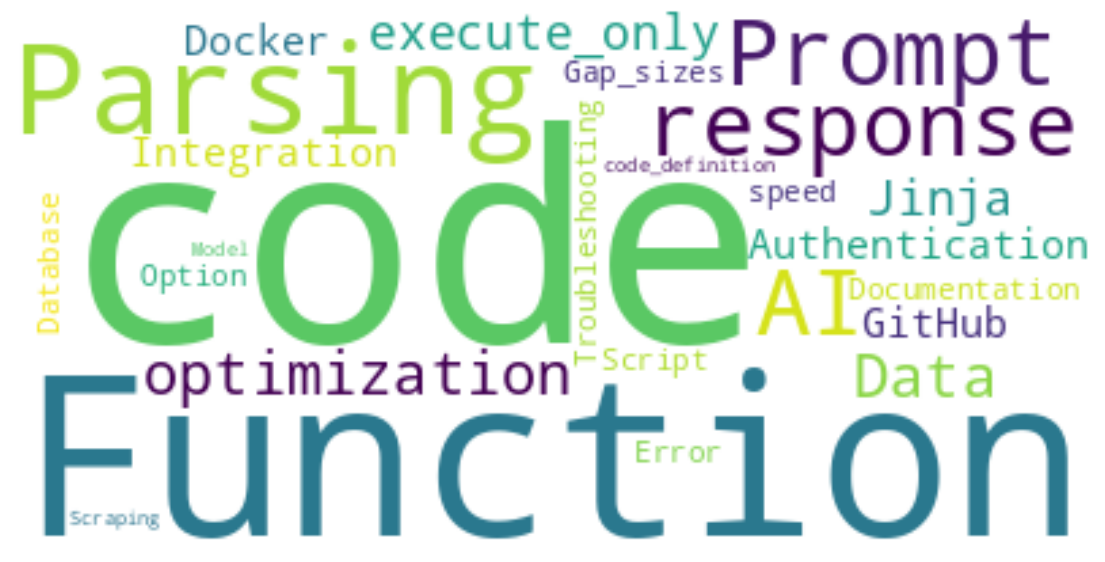

<Figure size 640x480 with 0 Axes>

In [110]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
plt.imshow(core_topics_, interpolation='bilinear')
plt.axis('off')
plt.show()

# save image
# plt.savefig("output/core_developer_topics_wc.jpg")
plt.savefig("/content/drive/My Drive/AfariUduak663/output/core_topics_wordcloud.png")


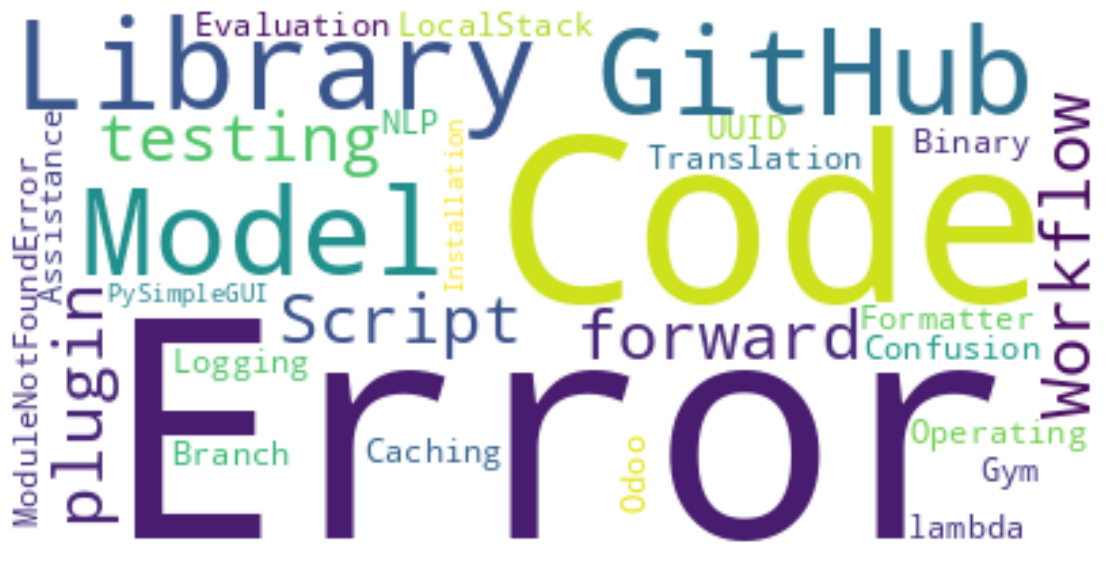

<Figure size 640x480 with 0 Axes>

In [111]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
plt.imshow(peri_topics_, interpolation='bilinear')
plt.axis('off')
plt.show()

# save to output file
plt.savefig("/content/drive/My Drive/AfariUduak663/output/peripheral_topics_wordcloud.png")


Obtain frequency of words by categories

In [113]:

# Sample text data (replace this with your actual data)
text = str(cleaned_list_core)

# Tokenization and preprocessing
nlp = spacy.load("en_core_web_sm")
tokens_ = [token.text.lower() for token in nlp(text) if token.is_alpha]

# Count word frequencies
word_frequencies_ = Counter(tokens_)

# Extract words and their frequencies
words_, frequencies_ = zip(*word_frequencies_.items())

# Sort by frequency in descending order
sorted_indices_ = sorted(range(len(frequencies_)), key=lambda k: frequencies_[k], reverse=True)
sorted_words_ = [words_[i] for i in sorted_indices_]
sorted_frequencies = [frequencies_[i] for i in sorted_indices_]


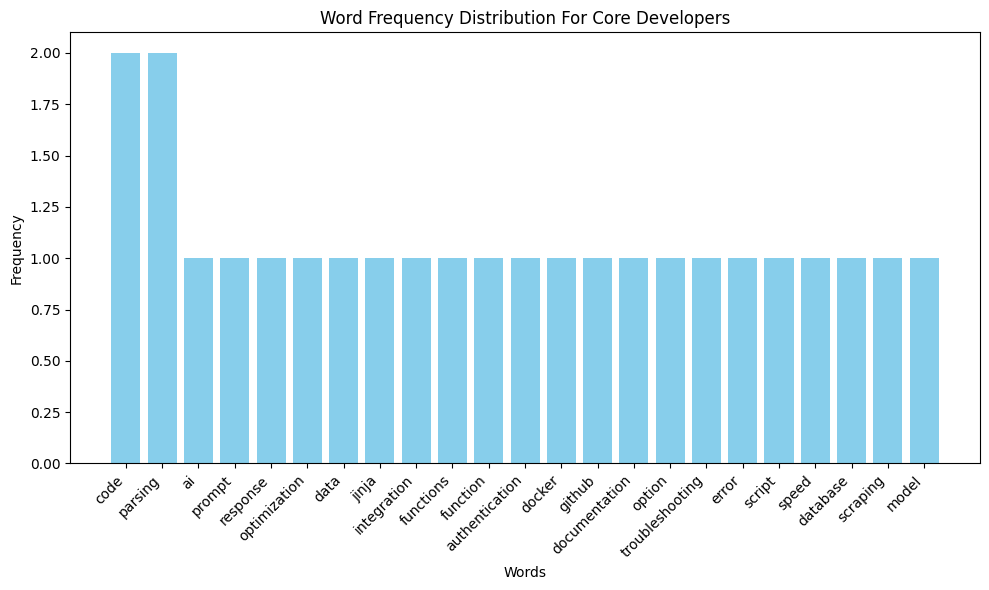

<Figure size 640x480 with 0 Axes>

In [114]:

# Plot the distribution bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_words_)), sorted_frequencies, tick_label=sorted_words_, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution For Core Developers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# save plot
plt.savefig("/content/drive/My Drive/AfariUduak663/output/core_topics_frequency.png")


In [115]:

# Sample text data (replace this with your actual data)
text = str(cleaned_list_peri)

# Tokenization and preprocessing
nlp = spacy.load("en_core_web_sm")
tokens = [token.text.lower() for token in nlp(text) if token.is_alpha]

# Count word frequencies
word_frequencies = Counter(tokens)

# Extract words and their frequencies
words, frequencies = zip(*word_frequencies.items())

# Sort by frequency in descending order
sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
sorted_words = [words[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]


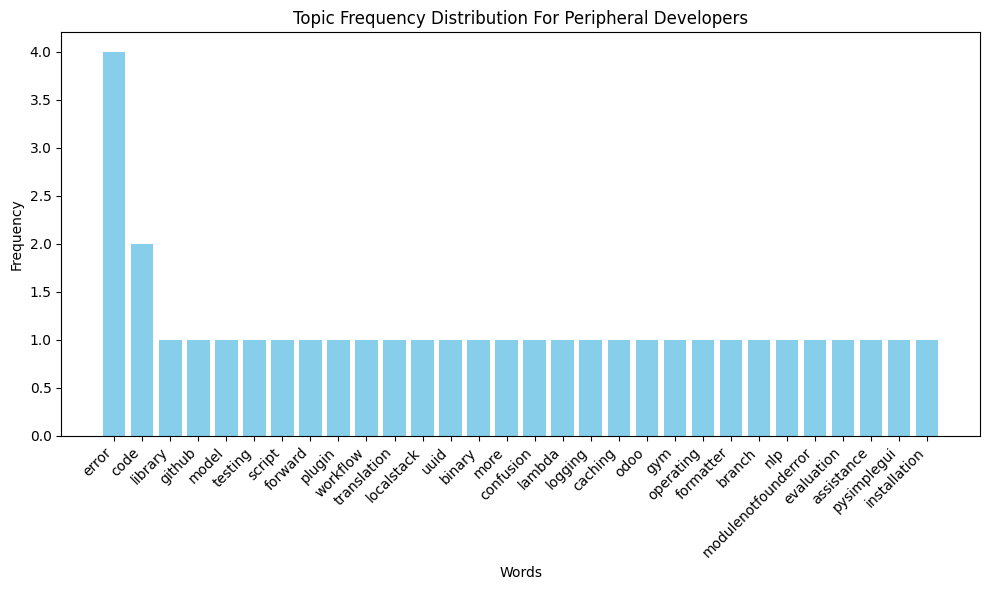

<Figure size 640x480 with 0 Axes>

In [116]:
# Plot the distribution bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_words)), sorted_frequencies, tick_label=sorted_words, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Topic Frequency Distribution For Peripheral Developers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# save plot
plt.savefig("/content/drive/My Drive/AfariUduak663/output/peripheral_topics_frequency.png")


Semantic similarity

In [88]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


{'error', 'script', 'github', 'model', 'code'}


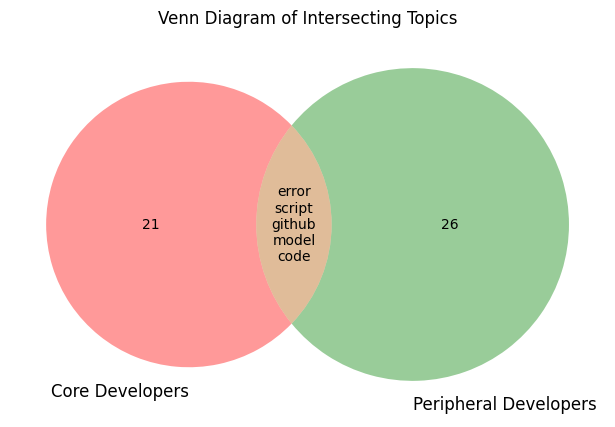

<Figure size 640x480 with 0 Axes>

In [117]:
text1 = cleaned_list_core
text2 = cleaned_list_peri


# Function to find semantically related words with a minimum cosine similarity
# def find_semantically_related_words(word, word_list, min_similarity=0.2):
#     similarities = [cosine_similarity([model.wv[word]], [model.wv[w]])[0][0] for w in word_list]
#     related_words = [word_list[i] for i, sim in enumerate(similarities) if sim >= min_similarity]
#     return related_words
def catch(word,w):
  try:
    return wv.similarity(w, word)
  except:
    return 0


def find_semantically_related_words(word, word_list, min_similarity=0.5):
    similarities = [catch(word, w) for w in word_list]
    related_words = [word_list[i] for i, sim in enumerate(similarities) if sim >= min_similarity]
    # print(related_words)
    if related_words:
      return word
    # return related_words

# Find semantically related words in text1 and text2 with a minimum cosine similarity of 0.5
related_words_text1 = [find_semantically_related_words(word, text2) for word in text1]
common_words = []
for word in related_words_text1:
  if word != None:
    common_words.append(word)
# related_words_text2 = [word: find_semantically_related_words(word, text1) for word in text2]
common_words = [word.lower() for word in common_words]

common_words = set(common_words)
print(common_words)
# Create sets for Venn diagram
set_text1 = set(text1)
set_text2 = set(text2)
# print(set_text1)
# set_related_words_intersection = set(word for words in related_words_text1.values() for word in words)
plt.figure(figsize=(35, 5))
# Create a Venn diagram for the sets with the manually defined common words
venn_diagram = venn2([set_text1, set_text2], set_labels=('Core Developers', 'Peripheral Developers'))

# Display the manually defined common words in the Venn diagram
venn_diagram.get_label_by_id('11').set_text('\n'.join(common_words))


plt.title("Venn Diagram of Intersecting Topics")
plt.show()

# save plots
plt.savefig("/content/drive/My Drive/AfariUduak663/output/venn_diagram.png")


## Evaluation

In [102]:
def compute_coherence_values(texts, start, limit, step):
  coherence_values_c_v = []
  coherence_values_umass = []
  model_list = []

  for num_topics in range(start, limit, step):
    print(num_topics)
    topic_model = BERTopic(nr_topics=num_topics)
    topics, _ = topic_model.fit_transform(texts)
    cleaned_docs_core = topic_model._preprocess_text(texts)
    vectorizer = topic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    tokens = [analyzer(doc) for doc in cleaned_docs_core]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topics = topic_model.get_topics()
    topics.pop(-1, None)
    # topic_words = [
    #   [word for word, _ in topic_model.get_topic(topic) if word != ""] for topic in topics
    # ]
    topic_words = [[words for words, _ in topic_model.get_topic(topic)]
              for topic in range(len(set(topics))-1)]

    # Evaluate
    coherence_model_cv = CoherenceModel(topics=topic_words,
                                texts=tokens,
                                corpus=corpus,
                                dictionary=dictionary,
                                coherence='c_v')

    # Evaluate
    coherence_model_umass = CoherenceModel(topics=topic_words,
                                    texts=tokens,
                                    corpus=corpus,
                                    dictionary=dictionary,
                                    coherence='u_mass')

    coherence_values_c_v.append(coherence_model_cv.get_coherence())
    coherence_values_umass.append(coherence_model_umass.get_coherence())
    # print(f'cv: {coherence_values_c_v}, umass: {coherence_values_umass}')

  return coherence_values_umass, coherence_values_c_v, model_list


In [94]:
coherence_values_umass, coherence_values_c_v, model_list = compute_coherence_values(peri_all, start=5, limit=50, step=5)


5


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

cv: [0.45242721189972207], umass: [-1.3684483683343645]
10
cv: [0.45242721189972207, 0.6156048035346817], umass: [-1.3684483683343645, -1.2306212718582303]
15
cv: [0.45242721189972207, 0.6156048035346817, 0.5156725408486205], umass: [-1.3684483683343645, -1.2306212718582303, -3.443886794602395]
20
cv: [0.45242721189972207, 0.6156048035346817, 0.5156725408486205, 0.5105494840066527], umass: [-1.3684483683343645, -1.2306212718582303, -3.443886794602395, -3.030093298577496]
25
cv: [0.45242721189972207, 0.6156048035346817, 0.5156725408486205, 0.5105494840066527, 0.5890168757257853], umass: [-1.3684483683343645, -1.2306212718582303, -3.443886794602395, -3.030093298577496, -2.6740517984856673]
30
cv: [0.45242721189972207, 0.6156048035346817, 0.5156725408486205, 0.5105494840066527, 0.5890168757257853, 0.608560292707234], umass: [-1.3684483683343645, -1.2306212718582303, -3.443886794602395, -3.030093298577496, -2.6740517984856673, -2.905186315688589]
35
cv: [0.45242721189972207, 0.615604803534

In [95]:
coherence_values_umass_core, coherence_values_c_v_core, model_list = compute_coherence_values(core_all, start=5, limit=50, step=5)


5
cv: [0.3956767319283581], umass: [-1.2161212906907626]
10
cv: [0.3956767319283581, 0.4688018207605176], umass: [-1.2161212906907626, -1.2814002683966192]
15
cv: [0.3956767319283581, 0.4688018207605176, 0.5373340034120415], umass: [-1.2161212906907626, -1.2814002683966192, -1.2589888479593663]
20
cv: [0.3956767319283581, 0.4688018207605176, 0.5373340034120415, 0.5977813465459851], umass: [-1.2161212906907626, -1.2814002683966192, -1.2589888479593663, -1.760958076145493]
25
cv: [0.3956767319283581, 0.4688018207605176, 0.5373340034120415, 0.5977813465459851, 0.6390902521410676], umass: [-1.2161212906907626, -1.2814002683966192, -1.2589888479593663, -1.760958076145493, -2.2612080001830845]
30
cv: [0.3956767319283581, 0.4688018207605176, 0.5373340034120415, 0.5977813465459851, 0.6390902521410676, 0.6185055379336794], umass: [-1.2161212906907626, -1.2814002683966192, -1.2589888479593663, -1.760958076145493, -2.2612080001830845, -2.8456100059991223]
35
cv: [0.3956767319283581, 0.46880182076

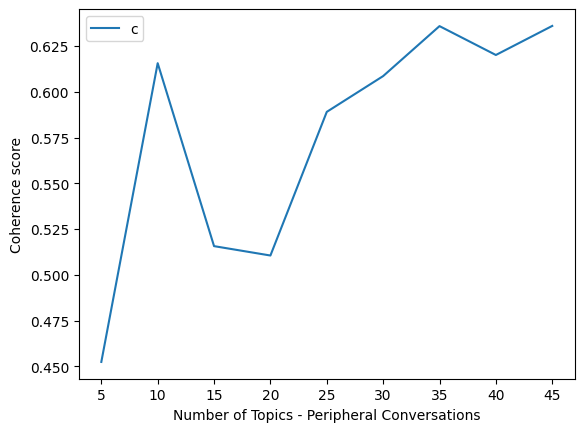

<Figure size 640x480 with 0 Axes>

In [118]:
start=5; limit=50; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values_c_v)
plt.xlabel("Number of Topics - Peripheral Conversations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# save plot
plt.savefig("/content/drive/My Drive/AfariUduak663/output/peripheral_cv_coherence.png")


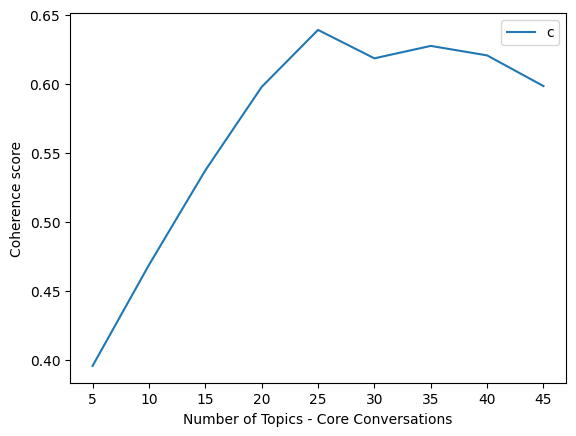

<Figure size 640x480 with 0 Axes>

In [119]:
start=5; limit=50; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values_c_v_core)
plt.xlabel("Number of Topics - Core Conversations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# save image
plt.savefig("/content/drive/My Drive/AfariUduak663/output/core_cv_coherence.png")


References


Bertopic:


Saving files:
https://saturncloud.io/blog/how-to-save-files-from-google-colab-to-google-drive-a-stepbystep-guide/

https://medium.com/@akaivdo/3-methods-to-save-plots-as-images-or-pdf-files-in-matplotlib-96a922fd2ce4#:~:text=The%20usual%20way%20to%20save,%2C%20JPEG%2C%20or%20PDF)